In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df = pd.read_excel('/content/Airlines+Data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [132]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [133]:
# Create the log_passenger column
import math
df['log_passenger'] = df['Passengers'].apply(lambda x: round(math.log(x), 6))
df.head()

,Month,Passengers,log_passenger
0,1995-01-01,112,4.718499
1,1995-02-01,118,4.770685
2,1995-03-01,132,4.882802
3,1995-04-01,129,4.859812
4,1995-05-01,121,4.795791


In [134]:
# Creating parameter t
df['t'] = df.index + 1
df.head()

,Month,Passengers,log_passenger,t
0,1995-01-01,112,4.718499,1
1,1995-02-01,118,4.770685,2
2,1995-03-01,132,4.882802,3
3,1995-04-01,129,4.859812,4
4,1995-05-01,121,4.795791,5


In [135]:
# Create the t^2 column
df['t_square'] = df['t'] ** 2
df.head()

,Month,Passengers,log_passenger,t,t_square
0,1995-01-01,112,4.718499,1,1
1,1995-02-01,118,4.770685,2,4
2,1995-03-01,132,4.882802,3,9
3,1995-04-01,129,4.859812,4,16
4,1995-05-01,121,4.795791,5,25


In [136]:
# Create dummy variables for the month
month_dummies = pd.get_dummies(df['Month'].dt.strftime('%b'), prefix='', prefix_sep='')
df = pd.concat([df, month_dummies], axis=1)
df.head()

,Month,Passengers,log_passenger,t,t_square,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,4.718499,1,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,4.770685,2,4,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,4.882802,3,9,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4.859812,4,16,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,4.795791,5,25,0,0,0,0,0,0,0,0,1,0,0,0


In [137]:
# Reorder the columns to match the reference dataset
df = df[['Month','Passengers','log_passenger','t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
df

,Month,Passengers,log_passenger,t,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,4.718499,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,4.770685,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,4.882802,3,9,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4.859812,4,16,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,4.795791,5,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,6.003887,92,8464,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,5.872118,93,8649,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,5.723585,94,8836,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,5.602119,95,9025,0,0,0,0,0,0,0,0,0,0,1,0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          96 non-null     datetime64[ns]
 1   Passengers     96 non-null     int64         
 2   log_passenger  96 non-null     float64       
 3   t              96 non-null     int64         
 4   t_square       96 non-null     int64         
 5   Jan            96 non-null     uint8         
 6   Feb            96 non-null     uint8         
 7   Mar            96 non-null     uint8         
 8   Apr            96 non-null     uint8         
 9   May            96 non-null     uint8         
 10  Jun            96 non-null     uint8         
 11  Jul            96 non-null     uint8         
 12  Aug            96 non-null     uint8         
 13  Sep            96 non-null     uint8         
 14  Oct            96 non-null     uint8         
 15  Nov            96 non-nul

In [139]:
df.head()

,Month,Passengers,log_passenger,t,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,4.718499,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,4.770685,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,4.882802,3,9,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4.859812,4,16,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,4.795791,5,25,0,0,0,0,1,0,0,0,0,0,0,0


In [140]:
df["Date"] = pd.to_datetime(df.Month,format="%b-%y")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y") # year extraction

In [141]:
df.head()

,Month,Passengers,log_passenger,t,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,1995-01-01,112,4.718499,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1995-01-01,Jan,1995
1,1995-02-01,118,4.770685,2,4,0,1,0,0,0,0,0,0,0,0,0,0,1995-02-01,Feb,1995
2,1995-03-01,132,4.882802,3,9,0,0,1,0,0,0,0,0,0,0,0,0,1995-03-01,Mar,1995
3,1995-04-01,129,4.859812,4,16,0,0,0,1,0,0,0,0,0,0,0,0,1995-04-01,Apr,1995
4,1995-05-01,121,4.795791,5,25,0,0,0,0,1,0,0,0,0,0,0,0,1995-05-01,May,1995


<Axes: xlabel='month', ylabel='year'>

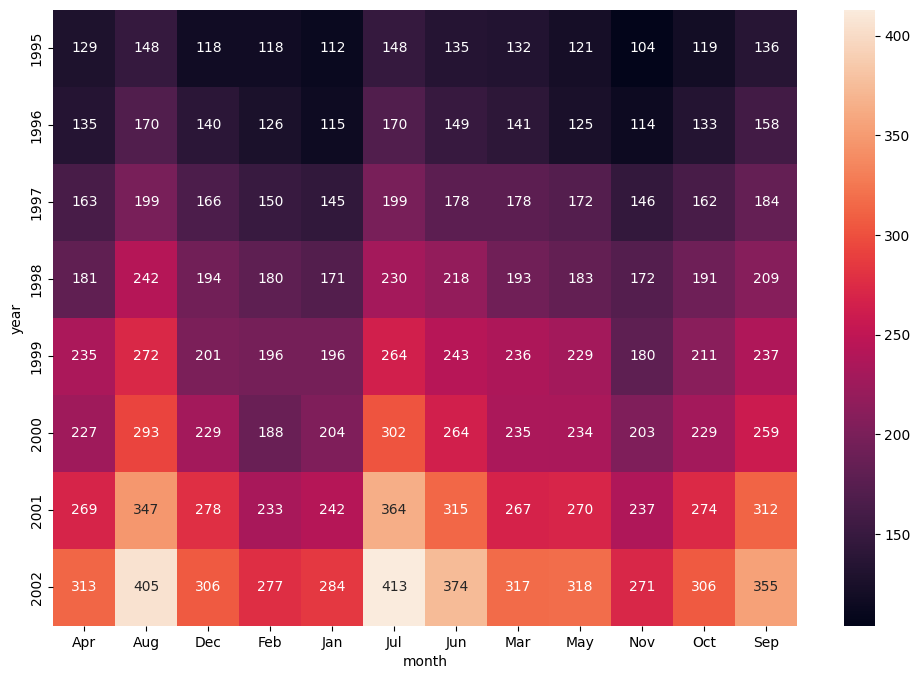

In [142]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<Axes: xlabel='year', ylabel='Passengers'>

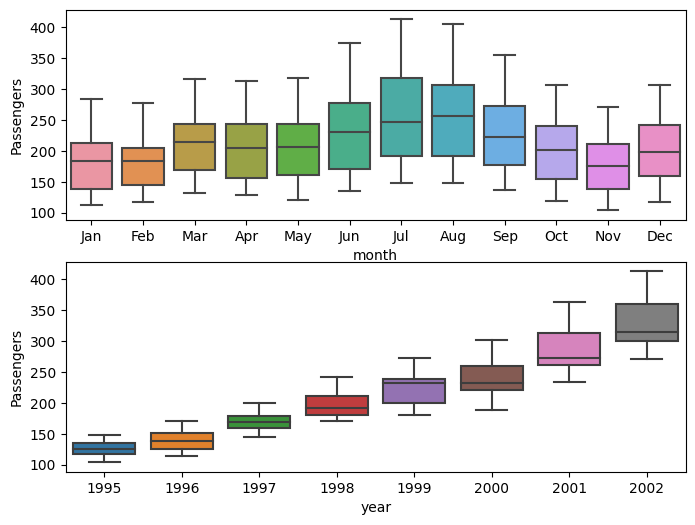

In [143]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=df)


# Splitting data

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          96 non-null     datetime64[ns]
 1   Passengers     96 non-null     int64         
 2   log_passenger  96 non-null     float64       
 3   t              96 non-null     int64         
 4   t_square       96 non-null     int64         
 5   Jan            96 non-null     uint8         
 6   Feb            96 non-null     uint8         
 7   Mar            96 non-null     uint8         
 8   Apr            96 non-null     uint8         
 9   May            96 non-null     uint8         
 10  Jun            96 non-null     uint8         
 11  Jul            96 non-null     uint8         
 12  Aug            96 non-null     uint8         
 13  Sep            96 non-null     uint8         
 14  Oct            96 non-null     uint8         
 15  Nov            96 non-nul

In [145]:
Train = df.head(71)
Test = df.tail(25)

In [146]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

49.93200850689322

In [147]:
#Exponential

Exp = smf.ols('log_passenger~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


42.12023842348655

In [148]:
#Quadratic

Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.01634803566434

In [149]:
#Additive seasonality

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

126.22162484209177

In [150]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passenger~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

130.99439262417866

In [151]:
#Compare the results

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_Mult_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_Mult_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_Exp,42.120238
2,rmse_Quad,48.016348
0,rmse_linear,49.932009
3,rmse_add_sea,126.221625
4,rmse_Mult_sea,130.994393


Exponential model shows better results, so Exponential model can be used for forecasting

# Cocacola Sales

In [153]:
cc = pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx')
cc.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


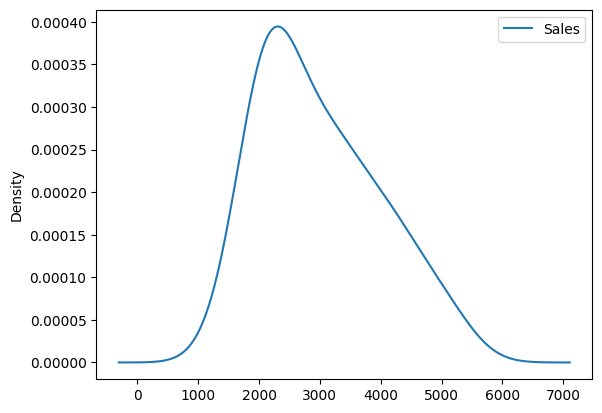

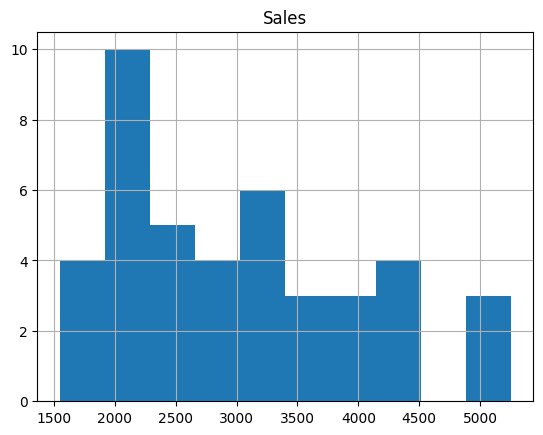

In [154]:
cc.plot(kind="kde")
cc.hist()
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

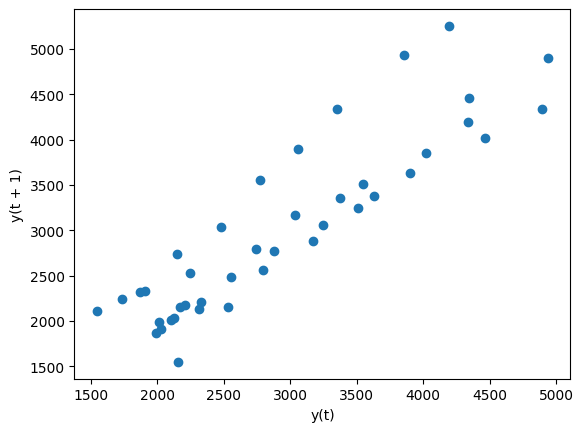

In [155]:
from pandas.plotting import lag_plot
lag_plot(cc['Sales'])

In [156]:
cc['quarter'] = 0
for i in range(42):
    p=cc['Quarter'][i]
    cc['quarter'][i]=p[0:2]

cc

<ipython-input-156-2b8f88110d9e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc['quarter'][i]=p[0:2]


,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [157]:
cc_dummies = pd.DataFrame(pd.get_dummies(cc['quarter']),columns=['Q1','Q2','Q3','Q4'])
cc = pd.concat([cc,cc_dummies],axis= 1)

In [158]:
cc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [160]:
cc['t'] = np.arange(1,43)
cc['t_squared'] = cc['t']**2
cc["Sales_log"] =np.log(cc['Sales'])

In [161]:
cc.head()


,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


<Axes: xlabel='Quarter', ylabel='Sales'>

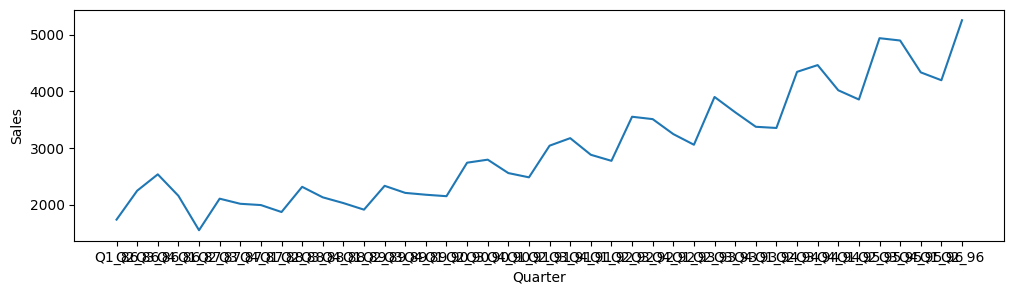

In [166]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Quarter",y="Sales",data=cc)

Model building

In [162]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quarter    42 non-null     object 
 1   Sales      42 non-null     float64
 2   quarter    42 non-null     object 
 3   Q1         42 non-null     uint8  
 4   Q2         42 non-null     uint8  
 5   Q3         42 non-null     uint8  
 6   Q4         42 non-null     uint8  
 7   t          42 non-null     int64  
 8   t_squared  42 non-null     int64  
 9   Sales_log  42 non-null     float64
dtypes: float64(2), int64(2), object(2), uint8(4)
memory usage: 2.3+ KB


In [164]:
Train = cc.head(30)
Test = cc.tail(12)

In [167]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Sales~t',data=cc).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

449.799622612296

In [168]:
#Exponential

Exp = smf.ols('Sales_log~t',data=cc).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


417.560828374984

In [177]:
#Quadratic

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

646.2715428311304

In [172]:
#Additive seasonality

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1778.0065467941367

In [174]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

586.0533067871008

In [178]:
##Multiplicative Seasonality

Mul_sea = smf.ols('Sales_log~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1828.9238912138117

In [180]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('Sales_log~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

410.24970596082767

In [181]:
#Compare the results

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,410.249706
1,rmse_Exp,417.560828
0,rmse_linear,449.799623
4,rmse_add_sea_quad,586.053307
2,rmse_Quad,646.271543
3,rmse_add_sea,1778.006547
5,rmse_Mult_sea,1828.923891


Multi added seasonality  model shows better results, so this model can be used for forecasting